<a href="https://colab.research.google.com/github/SuaCo/Herramienta_trazabilidad/blob/main/Herramienta_de_trazabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guía de Uso de la Herramienta de Trazabilidad bellpi

¡Bienvenidos al prototipo de nuestra herramienta de trazabilidad en Google Colab!


## Paso 1: Ejecutar el Código
Una vez dentro, verás varias celdas de código. Para ejecutarlas, simplemente haz clic en el botón "Play" en la esquina superior izquierda de cada celda.

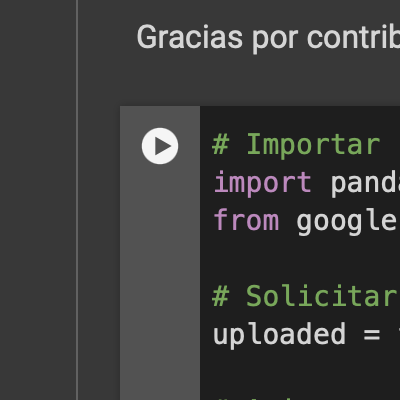

## Paso 2: Ingresar Datos
En la primera celda, se te solicitará que ingreses el archivo de Excel de registro de alistamiento. Por favor, descárgalo del equipo de alistamiento en Teams y súbelo aquí para poder continuar.

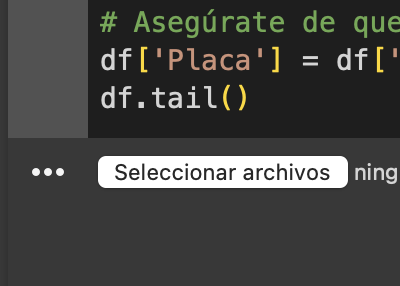

## Paso 3: Obtener Resultados
Después de ejecutar todas las celdas, los resultados de la trazabilidad se mostrarán automáticamente. Puedes ver los datos procesados y tomar las decisiones correspondientes.

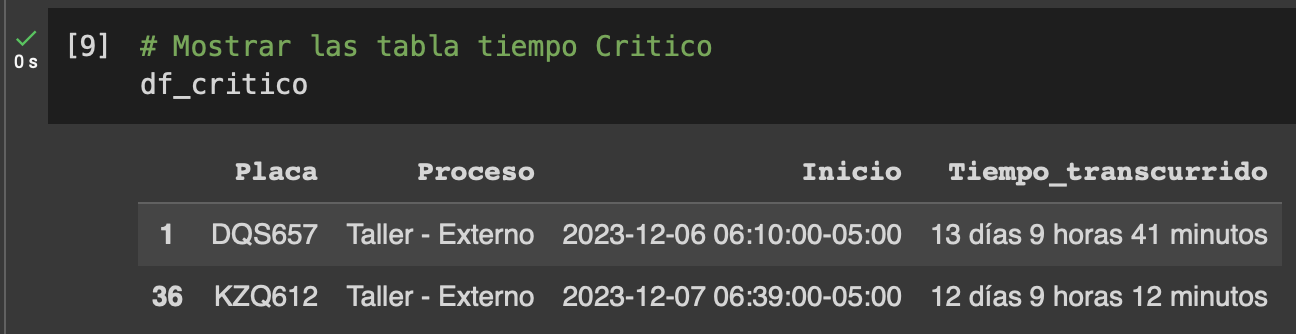

---

### ¿Necesitas Ayuda?
Si en algún momento tienes dudas o necesitas asistencia, no dudes en contactar al equipo de Service Designer. Estamos para ayudarte.

Gracias por contribuir al éxito de bellpi con tu compromiso y esfuerzo en el uso de esta herramienta. ¡Juntos, hacemos la diferencia!

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from google.colab import files

# Solicitar al usuario que cargue un archivo de Excel descargado del equipo de Teams
uploaded = files.upload()

# Asignar el nombre del archivo a una variable (asumiendo que solo se carga un archivo)
filename = next(iter(uploaded))

# Leer el archivo de Excel
df = pd.read_excel(filename)

# Establecer los nombres de las columnas del DataFrame
df.columns = ['ID', 'Inicio', 'Finalizacion', 'Correo', 'Nombre', 'Modificacion', 'Placa', 'Sede', 'Proceso', 'Estado', 'Contador']
# Asegúrate de que las letras en la columna de placas estén en mayúsculas y sin espacios
df['Placa'] = df['Placa'].str.replace(' ', '').str.upper()

#Aquí te aseguras que todos los datos fueron cargados al mostrarte los ultimos 5 datos de la tabla
df.tail()

Saving Registro de alistamiento.xlsx to Registro de alistamiento.xlsx


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ID,Inicio,Finalizacion,Correo,Nombre,Modificacion,Placa,Sede,Proceso,Estado,Contador
285,293,2023-12-18 15:44:00,2023-12-18 15:44:00,nelson.a@bellpi.com,Nelson Andres Torres Davila,NaN,FON366,Sede 170,Taller - Externo,Iniciado,1
286,294,2023-12-18 15:44:00,2023-12-18 15:44:00,nelson.a@bellpi.com,Nelson Andres Torres Davila,NaN,LHR916,Sede 170,Taller - Externo,Iniciado,1
287,295,2023-12-18 15:44:00,2023-12-18 15:45:00,nelson.a@bellpi.com,Nelson Andres Torres Davila,NaN,DRY579,Sede 170,Taller - Externo,Iniciado,1
288,296,2023-12-18 15:45:00,2023-12-18 15:45:00,nelson.a@bellpi.com,Nelson Andres Torres Davila,NaN,JUM996,Sede 170,Taller - Externo,Iniciado,1
289,297,2023-12-19 08:32:00,2023-12-19 08:32:00,brandon@bellpi.com,Brandon Jair Martinez Neita,NaN,KZS836,Sede 170,Inspección del vehículo,Iniciado,1


In [ ]:
# Procesos del mes

import pandas as pd
from datetime import datetime

# Obtener la fecha actual
fecha_actual = datetime.now()

# Separar los datos en dos grupos: Iniciado y Finalizado
df_iniciados = df[df['Estado'] == 'Iniciado'][['ID', 'Placa', 'Proceso', 'Inicio']].copy()
df_finalizados = df[df['Estado'] == 'Finalizado'][['ID', 'Placa', 'Proceso', 'Finalizacion']].copy()

# Convertir las columnas de fecha a datetime
df_iniciados['Inicio'] = pd.to_datetime(df_iniciados['Inicio'])
df_finalizados['Finalizacion'] = pd.to_datetime(df_finalizados['Finalizacion'])

# Filtrar para incluir solo los procesos iniciados en el mismo mes y año que la fecha actual
df_iniciados = df_iniciados[df_iniciados['Inicio'].dt.month == fecha_actual.month]
df_iniciados = df_iniciados[df_iniciados['Inicio'].dt.year == fecha_actual.year]

# Crear un DataFrame para todos los procesos, tanto iniciados como finalizados
todos_los_procesos = pd.concat([
    df_iniciados.rename(columns={'Inicio': 'Fecha'}),
    df_finalizados.rename(columns={'Finalizacion': 'Fecha'})
])

# Ordenar por 'Placa', 'Proceso', y 'ID'
todos_los_procesos.sort_values(by=['Placa', 'Proceso', 'ID'], inplace=True)

# Agrupar por 'Placa' y 'Proceso' para identificar los pares de inicio y finalización
def agrupar_procesos(grupo):
    if len(grupo) == 1:
        # Si solo hay un registro, es un proceso abierto
        return 'En proceso'
    else:
        # Si hay dos registros, el proceso se ha finalizado
        inicio = grupo.iloc[0]['Fecha']
        fin = grupo.iloc[1]['Fecha']
        duracion = fin - inicio
        return duracion

# Agrupando por 'Placa' y 'Proceso' y aplicando la función
tabla_procesos = todos_los_procesos.groupby(['Placa', 'Proceso']).apply(agrupar_procesos).reset_index()

# Creando un DataFrame pivotado por Mes
tabla_pivotada_mes = tabla_procesos.pivot(index='Placa', columns='Proceso', values=0)

# Reemplazando los datos NaN por '-'
tabla_pivotada_mes.fillna('-', inplace=True)

# Mostrando los resultados de los procesos del mes
tabla_pivotada_mes


Proceso,Automas,Exhibición,Inspección del vehículo,Lavado entrega al cliente,Publicado,Taller - Externo,Toma de fotografías,Toma de fotografías y edición,Transporte
Placa,,,,,,,,,
DQS657,-,-,-,-,-,En proceso,-,-,-
DRY579,-,-,0 days 00:23:00,-,-,11 days 23:08:00,-,-,-
DUO022,-,-,-,-,9 days 06:51:00,-,En proceso,-,0 days 17:07:00
EFN291,-,-,-,-,-,0 days 00:44:00,-,-,-
EIY197,-,-,-,-,9 days 06:49:00,-,En proceso,-,0 days 17:08:00
...,...,...,...,...,...,...,...,...,...
LTP109,-,-,-,En proceso,-,-,-,-,-
LTX217,-,-,-,En proceso,-,-,-,-,-
LVX355,-,En proceso,-,-,-,-,-,-,-


In [ ]:
#Procesos historico
import pandas as pd

# Suponiendo que df es tu DataFrame original
# df = pd.read_csv('tu_archivo.csv') # Asegúrate de cargar tu DataFrame aquí

# Separar los datos en dos grupos: Iniciado y Finalizado
df_iniciados = df[df['Estado'] == 'Iniciado'][['ID', 'Placa', 'Proceso', 'Inicio']].copy()
df_finalizados = df[df['Estado'] == 'Finalizado'][['ID', 'Placa', 'Proceso', 'Finalizacion']].copy()

# Convertir las columnas de fecha a datetime
df_iniciados['Inicio'] = pd.to_datetime(df_iniciados['Inicio'])
df_finalizados['Finalizacion'] = pd.to_datetime(df_finalizados['Finalizacion'])

# Crear un DataFrame para todos los procesos, tanto iniciados como finalizados
todos_los_procesos = pd.concat([
    df_iniciados.rename(columns={'Inicio': 'Fecha'}),
    df_finalizados.rename(columns={'Finalizacion': 'Fecha'})
])

# Ordenar por 'Placa', 'Proceso', y 'ID'
todos_los_procesos.sort_values(by=['Placa', 'Proceso', 'ID'], inplace=True)

# Agrupar por 'Placa' y 'Proceso' para identificar los pares de inicio y finalización
def agrupar_procesos(grupo):
    if len(grupo) == 1:
        # Si solo hay un registro, es un proceso abierto
        return 'En proceso'
    else:
        # Si hay dos registros, el proceso se ha finalizado
        inicio = grupo.iloc[0]['Fecha']
        fin = grupo.iloc[1]['Fecha']
        duracion = fin - inicio
        return duracion

# Agrupando por 'Placa' y 'Proceso' y aplicando la función
tabla_procesos = todos_los_procesos.groupby(['Placa', 'Proceso']).apply(agrupar_procesos).reset_index()

# Creando un DataFrame pivotado
tabla_pivotada = tabla_procesos.pivot(index='Placa', columns='Proceso', values=0)

# Reemplazando NaN por '-'
tabla_pivotada.fillna('-', inplace=True)

# Mostrando los resultados de todos los procesos que se encuentran en el documento de Excel
tabla_pivotada


Proceso,Automas,Exhibición,Inspección del vehículo,Lavado entrega al cliente,Publicado,Taller - Externo,Toma de fotografías,Toma de fotografías y edición,Transporte
Placa,,,,,,,,,
DQS657,-,-,-,-,-,En proceso,-,-,-
DRY579,-,-,0 days 00:23:00,-,-,11 days 23:08:00,-,-,-
DUO022,-,-,-,-,9 days 06:51:00,-,En proceso,-,0 days 17:07:00
EFN291,-,-,-,-,-,0 days 00:44:00,-,-,-
EIY197,-,-,-,-,9 days 06:49:00,-,En proceso,-,0 days 17:08:00
...,...,...,...,...,...,...,...,...,...
LTP109,-,-,-,En proceso,-,-,-,-,-
LTX217,-,-,-,En proceso,-,-,-,-,-
LVX355,-,En proceso,-,-,-,-,-,-,-


In [ ]:
#Crear tablas de los procesos activos categorizadas por tiempo
# Proceso normal del proceso 0 - 6 días
# Proceso a prestar atención 6 - 9 días
# Proceso crítico mayor a 9 días ++

import pandas as pd
from datetime import datetime
import pytz

# Asegúrate de tener df_iniciados y df_finalizados definidos antes

# Función para formatear la duración
def format_timedelta(td):
    if pd.isnull(td):
        return '-'
    else:
        days = td.days
        hours, remainder = divmod(td.seconds, 3600)
        minutes, _ = divmod(remainder, 60)
        return f"{days} días {hours} horas {minutes} minutos"

# Lista para almacenar los resultados de procesos abiertos
resultados_procesos_abiertos = []

# Iterar a través de cada proceso iniciado
for index, iniciado in df_iniciados.iterrows():
    # Filtrar procesos finalizados que coincidan y con ID mayor
    posibles_finalizados = df_finalizados[
        (df_finalizados['Placa'] == iniciado['Placa']) &
        (df_finalizados['Proceso'] == iniciado['Proceso']) &
        (df_finalizados['ID'] > iniciado['ID'])
    ]

    # Considerar como abierto si no hay finalizados correspondientes
    if posibles_finalizados.empty:
        resultados_procesos_abiertos.append(iniciado)

# DataFrame de procesos abiertos
df_procesos_abiertos = pd.DataFrame(resultados_procesos_abiertos)

# Convertir 'Inicio' a zona horaria de Bogotá
df_procesos_abiertos['Inicio'] = pd.to_datetime(df_procesos_abiertos['Inicio']).dt.tz_localize('UTC').dt.tz_convert('America/Bogota')

# Fecha y hora actual en Bogotá
now_bogota = datetime.now(pytz.timezone('America/Bogota'))

# Calcular duración hasta el momento actual
df_procesos_abiertos['Tiempo_del_proceso'] = now_bogota - df_procesos_abiertos['Inicio']
df_procesos_abiertos['Tiempo_del_proceso_str'] = df_procesos_abiertos['Tiempo_del_proceso'].apply(format_timedelta)

# Mostrar procesos abiertos
df_procesos_abiertos_final = df_procesos_abiertos[['Placa', 'Proceso', 'Inicio', 'Tiempo_del_proceso_str']].copy()

# Función para convertir 'Tiempo_del_proceso_str' a días
def convert_to_days(time_str):
    parts = time_str.split(' ')
    days = int(parts[0]) if parts[0].isdigit() else 0
    return days

# Convertir 'Tiempo_del_proceso_str' a días
df_procesos_abiertos_final['Dias_transcurridos'] = df_procesos_abiertos_final['Tiempo_del_proceso_str'].apply(convert_to_days)

# Crear filtros para las tres categorías
filtro_normal = df_procesos_abiertos_final['Dias_transcurridos'] < 6
filtro_atencion = (df_procesos_abiertos_final['Dias_transcurridos'] >= 6) & (df_procesos_abiertos_final['Dias_transcurridos'] < 9)
filtro_critico = df_procesos_abiertos_final['Dias_transcurridos'] >= 9

# Crear las tres nuevas tablas
df_normal = df_procesos_abiertos_final[filtro_normal].copy()
df_normal = df_normal.drop(columns=['Dias_transcurridos'])
df_atencion = df_procesos_abiertos_final[filtro_atencion].copy()
df_atencion = df_atencion.drop(columns=['Dias_transcurridos'])
df_critico = df_procesos_abiertos_final[filtro_critico].copy()
df_critico = df_critico.drop(columns=['Dias_transcurridos'])


# Cambiar el nombre de la columna 'Tiempo_del_proceso_str' a 'Tiempo_transcurrido'
for df in [df_normal, df_atencion, df_critico]:
    df.rename(columns={'Tiempo_del_proceso_str': 'Tiempo_transcurrido'}, inplace=True)


In [ ]:
# Mostrar las tabla tiempo Normal
df_normal

,Placa,Proceso,Inicio,Tiempo_transcurrido
207,LHR796,Taller - Externo,2023-12-14 03:42:00-05:00,5 días 12 horas 9 minutos
209,JUM996,Taller - Externo,2023-12-14 03:43:00-05:00,5 días 12 horas 8 minutos
220,JZL687,Transporte,2023-12-14 05:46:00-05:00,5 días 10 horas 5 minutos
233,JXL687,Toma de fotografías y edición,2023-12-14 09:45:00-05:00,5 días 6 horas 6 minutos
239,FVN141,Taller - Externo,2023-12-15 07:06:00-05:00,4 días 8 horas 45 minutos
240,KYV171,Taller - Externo,2023-12-15 07:07:00-05:00,4 días 8 horas 44 minutos
241,KZQ845,Taller - Externo,2023-12-15 07:07:00-05:00,4 días 8 horas 44 minutos
242,GCU972,Taller - Externo,2023-12-15 07:07:00-05:00,4 días 8 horas 44 minutos
243,KZQ612,Taller - Externo,2023-12-15 07:08:00-05:00,4 días 8 horas 43 minutos
249,JQT929,Taller - Externo,2023-12-16 03:55:00-05:00,3 días 11 horas 56 minutos


In [ ]:
# Mostrar las tabla tiempo Atención
df_atencion

,Placa,Proceso,Inicio,Tiempo_transcurrido
85,KQP845,Taller - Externo,2023-12-11 05:09:00-05:00,8 días 10 horas 42 minutos
86,KZQ845,Taller - Externo,2023-12-11 05:10:00-05:00,8 días 10 horas 41 minutos
87,LHR142,Taller - Externo,2023-12-11 05:11:00-05:00,8 días 10 horas 40 minutos
133,KYZ496,Taller - Externo,2023-12-12 05:20:00-05:00,7 días 10 horas 31 minutos
137,GWQ730,Taller - Externo,2023-12-12 05:23:00-05:00,7 días 10 horas 28 minutos
142,FVN141,Toma de fotografías y edición,2023-12-12 07:05:00-05:00,7 días 8 horas 46 minutos
176,EFN291,Taller - Externo,2023-12-13 05:08:00-05:00,6 días 10 horas 43 minutos
180,EJR9569,Toma de fotografías y edición,2023-12-13 06:15:00-05:00,6 días 9 horas 36 minutos
182,FVN141,Publicado,2023-12-13 07:02:00-05:00,6 días 8 horas 49 minutos


In [ ]:
# Mostrar las tabla tiempo Critico
df_critico

,Placa,Proceso,Inicio,Tiempo_transcurrido
1,DQS657,Taller - Externo,2023-12-06 06:10:00-05:00,13 días 9 horas 41 minutos
36,KZQ612,Taller - Externo,2023-12-07 06:39:00-05:00,12 días 9 horas 12 minutos
